In [3]:
import pandas as pd

# Load historical prices
tsla = pd.read_csv("../data/processed/TSLA_clean.csv", index_col="Date", parse_dates=True)
spy = pd.read_csv("../data/processed/SPY_clean.csv", index_col="Date", parse_dates=True)
bnd = pd.read_csv("../data/processed/BND_clean.csv", index_col="Date", parse_dates=True)


In [4]:
# Calculate daily returns
tsla_ret = tsla['Close'].pct_change().rename("TSLA")
spy_ret = spy['Close'].pct_change().rename("SPY")
bnd_ret = bnd['Close'].pct_change().rename("BND")

# Combine into one DataFrame
returns_df = pd.concat([tsla_ret, spy_ret, bnd_ret], axis=1).dropna()


In [5]:
returns_df.to_csv("../data/processed/returns.csv")


In [6]:
# Define backtesting period
backtest_start = "2024-08-01"
backtest_end = "2025-07-31"


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))
from backtest_utils import simulate_portfolio, calculate_sharpe_ratio

# Filter returns for backtest window
backtest_returns = returns_df.loc[backtest_start:backtest_end]

# Strategy weights from Task 4
strategy_weights = {
    "TSLA": 0.0001,
    "SPY": 0.5703,
    "BND": 0.4296
}

# Benchmark weights
benchmark_weights = {
    "TSLA": 0.0,
    "SPY": 0.6,
    "BND": 0.4
}

# Simulate both portfolios
strategy_perf = simulate_portfolio(backtest_returns, strategy_weights)
benchmark_perf = simulate_portfolio(backtest_returns, benchmark_weights)


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_37772\796414418.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_37772\796414418.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_37772\796414418.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("../results/plots/backtest_cumulative_returns.png")  # Save plot
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_37772\796414418.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("../results/plots/backtest_cumulative_returns.png")  # Save plot
c:\Users\filimon.hailemariam\Downloads\Week 11\GMF-investment-portfolio-management\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: Use

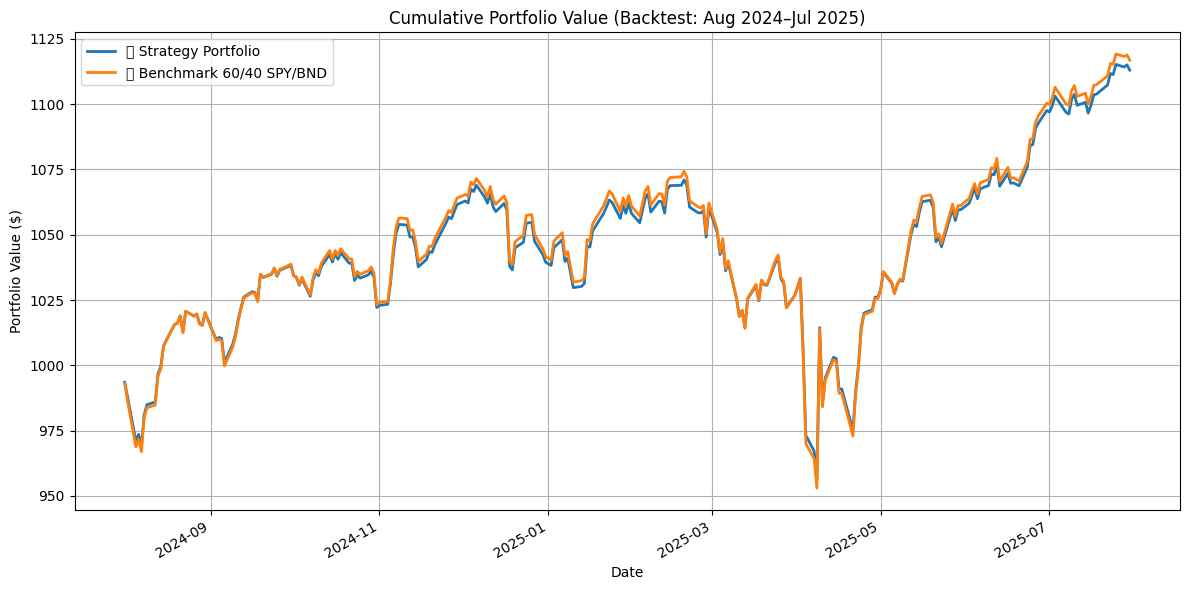

In [9]:
import matplotlib.pyplot as plt

# Plot cumulative portfolio values
plt.figure(figsize=(12, 6))
strategy_perf.plot(label="📈 Strategy Portfolio", linewidth=2)
benchmark_perf.plot(label="📊 Benchmark 60/40 SPY/BND", linewidth=2)
plt.title("Cumulative Portfolio Value (Backtest: Aug 2024–Jul 2025)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../results/plots/backtest_cumulative_returns.png")  # Save plot
plt.show()


In [10]:
# Calculate final total return
strategy_return = (strategy_perf.iloc[-1] / strategy_perf.iloc[0]) - 1
benchmark_return = (benchmark_perf.iloc[-1] / benchmark_perf.iloc[0]) - 1

# Calculate Sharpe Ratios
strategy_sharpe = calculate_sharpe_ratio(strategy_perf)
benchmark_sharpe = calculate_sharpe_ratio(benchmark_perf)

print("📈 Strategy Portfolio:")
print(f"  Total Return: {strategy_return:.2%}")
print(f"  Sharpe Ratio: {strategy_sharpe:.2f}")

print("\n📊 Benchmark Portfolio:")
print(f"  Total Return: {benchmark_return:.2%}")
print(f"  Sharpe Ratio: {benchmark_sharpe:.2f}")


📈 Strategy Portfolio:
  Total Return: 12.02%
  Sharpe Ratio: 0.94

📊 Benchmark Portfolio:
  Total Return: 12.47%
  Sharpe Ratio: 0.94
